# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Open Source](https://data.cityofnewyork.us/Public-Safety/Emergency-Response-Incidents/pasr-j7fb). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

## Data and Setup

____
** Import numpy and pandas **

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

** Import visualization libraries and set %matplotlib inline. **

In [2]:
%matplotlib inline

** Read in the csv file as a dataframe called df **

In [3]:
df = pd.read_csv(r"C:\Users\Urvashi\Desktop\New folder\Urvashi\Datasets\911.csv")
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


** Check the info() of the df **

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326425 entries, 0 to 326424
Data columns (total 9 columns):
lat          326425 non-null float64
lng          326425 non-null float64
desc         326425 non-null object
zip          286835 non-null float64
title        326425 non-null object
timeStamp    326425 non-null object
twp          326310 non-null object
addr         326425 non-null object
e            326425 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 22.4+ MB


In [5]:
df.isnull().sum()

lat              0
lng              0
desc             0
zip          39590
title            0
timeStamp        0
twp            115
addr             0
e                0
dtype: int64

In [6]:
# so there are 39590 Nan Values in Zip column n 115 in twp.

In [8]:
# To check a subset of dataframe for null values.
# This will give the dataframe where "zip" is null
df[df.zip.isnull()].head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
10,40.231990,-75.251891,RT202 PKWY & KNAPP RD; MONTGOMERY; 2015-12-10 ...,NaN,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:33:50,MONTGOMERY,RT202 PKWY & KNAPP RD,1
14,40.097222,-75.376195,SCHUYLKILL EXPY & CROTON RD UNDERPASS; UPPER M...,NaN,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:09:49,UPPER MERION,SCHUYLKILL EXPY & CROTON RD UNDERPASS,1
23,40.143326,-75.422819,RT422 & PAWLINGS RD OVERPASS; LOWER PROVIDENC...,NaN,Traffic: DISABLED VEHICLE -,2015-12-10 18:00:38,LOWER PROVIDENCE,RT422 & PAWLINGS RD OVERPASS,1
24,40.153268,-75.189558,SUMMIT AVE & RT309 UNDERPASS; UPPER DUBLIN; 20...,NaN,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:58:22,UPPER DUBLIN,SUMMIT AVE & RT309 UNDERPASS,1


## Exploratory Data Analysis

**top 5 zipcodes for 911 calls? **

In [9]:
df["zip"].value_counts().head()

19401.0    22136
19464.0    21588
19403.0    16488
19446.0    15793
19406.0    10800
Name: zip, dtype: int64

##### If we want to set "Label" to x & y axis, we would need to use matplotlib because df.plot() creates an matplotlib.axes.AxesSubplot object

Text(0,0.5,'Count')

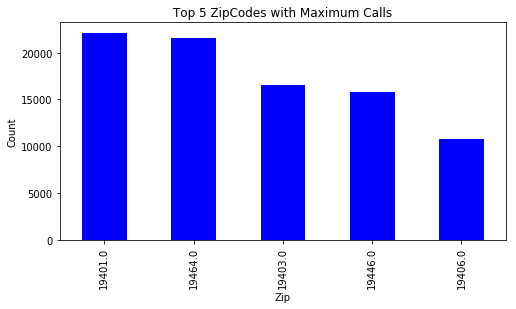

In [15]:
df["zip"].value_counts().head().plot(kind = "bar", color = "blue",title = "Top 5 ZipCodes with Maximum Calls",figsize = (8,4))
plt.xlabel("Zip")
plt.ylabel("Count")

** What are the top 5 townships (twp) for 911 calls? **

In [17]:
df["twp"].value_counts().head()

LOWER MERION    28073
ABINGTON        20206
NORRISTOWN      18433
UPPER MERION    17276
CHELTENHAM      15026
Name: twp, dtype: int64

In [18]:
import matplotlib

Text(0,0.5,'Count')

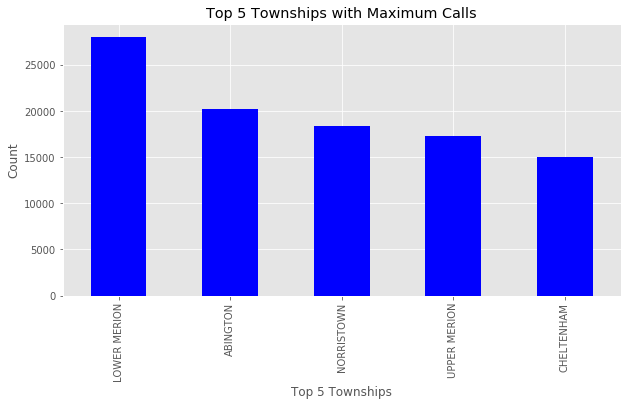

In [19]:
matplotlib.style.use("ggplot")
df["twp"].value_counts().head().plot(kind = "bar", color = "blue",title = "Top 5 Townships with Maximum Calls",figsize = (10,5))
plt.xlabel("Top 5 Townships")
plt.ylabel("Count")

** Take a look at the 'title' column, how many unique title codes are there? **

In [20]:
df["title"].nunique()

133

In [21]:
df["title"].value_counts().count()

133

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [124]:
# Alternatively, use df["Reason"] = df["title"].str.split(":").str[0]

In [31]:
df["Reason"] = df["title"].str.split(":").str.get(0)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015-12-10


** What is the most common Reason for a 911 call based off of this new column? **

In [8]:
df["Reason"].value_counts()

EMS        161441
Traffic    116065
Fire        48919
Name: Reason, dtype: int64

In [134]:
matplotlib.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 '_classic_test']

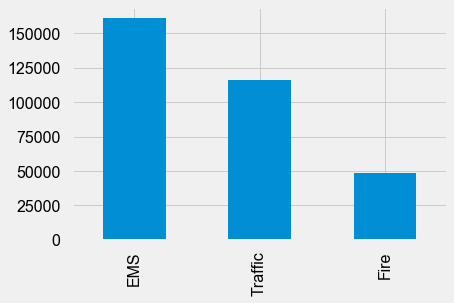

In [142]:
matplotlib.style.use("fivethirtyeight")
df["Reason"].value_counts().plot(kind = "bar")

** Now use seaborn to create a countplot of 911 calls by Reason. **

In [143]:
# We can create above plot using seaborn's countplot method.

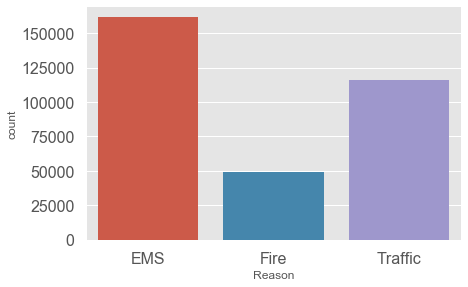

In [152]:
matplotlib.style.use("ggplot")
sns.countplot(x = "Reason", data = df)

___
** Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? **

In [155]:
df["timeStamp"].dtype.kind

'O'

In [156]:
df["timeStamp"].iloc[0]

'2015-12-10 17:10:52'

** You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects. **

In [24]:
df["timeStamp"] = pd.to_datetime(arg = df["timeStamp"])
df["timeStamp"].head()

0   2015-12-10 17:10:52
1   2015-12-10 17:29:21
2   2015-12-10 14:39:21
3   2015-12-10 16:47:36
4   2015-12-10 16:56:52
Name: timeStamp, dtype: datetime64[ns]

** You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.**

In [158]:
import datetime as dt

In [159]:
df["Hour"] = df["timeStamp"].dt.hour
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16


In [160]:
df["Month"] = df["timeStamp"].dt.month
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12


In [161]:
df["Day of Week"] = df["timeStamp"].dt.weekday_name
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thursday
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thursday
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thursday
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thursday
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thursday


** Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [186]:
dmap = {"Sunday" : 1,"Monday" : 2, "Tuesday" : 3, "Wednesday" : 4, "Thursday" : 5, "Friday" : 6, "Saturday" : 7}

In [202]:
# using map method to map the weekdays to weekday_no.

df["Day of Week"].map(dmap).head()

0    5
1    5
2    5
3    5
4    5
Name: Day of Week, dtype: int64

** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

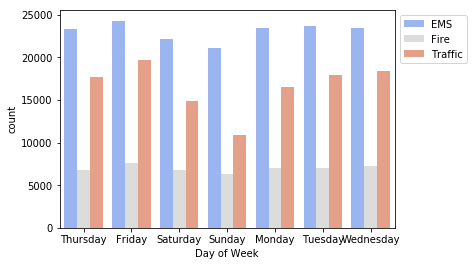

In [29]:
sns.countplot(x = df["Day of Week"], hue = df["Reasons/Departments"], palette= "coolwarm")
plt.legend(loc = 0, bbox_to_anchor = (1,1))

**Now do the same for Month:**

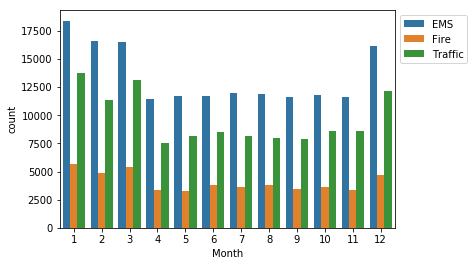

In [30]:
sns.countplot(x = df["Month"], hue = df["Reasons/Departments"])
plt.legend(bbox_to_anchor=(1, 1))

**Is there something strange about the Plot?**

_____

** It can be noted in the plot that some Months are missing, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas... **

** Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame. **

In [31]:
byMonth = df.groupby("Month").count()

In [32]:
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons/Departments,Hour,Day of Week,Day Num,Day Num 2
Month,,,,,,,,,,,,,,
1,37824,37824,37824,33480,37824,37824,37812,37824,37824,37824,37824,37824,37824,37824
2,32828,32828,32828,28963,32828,32828,32817,32828,32828,32828,32828,32828,32828,32828
3,34987,34987,34987,31070,34987,34987,34973,34987,34987,34987,34987,34987,34987,34987
4,22343,22343,22343,19671,22343,22343,22336,22343,22343,22343,22343,22343,22343,22343
5,23093,23093,23093,20254,23093,23093,23082,23093,23093,23093,23093,23093,23093,23093
6,24065,24065,24065,21070,24065,24065,24058,24065,24065,24065,24065,24065,24065,24065
7,23856,23856,23856,20940,23856,23856,23850,23856,23856,23856,23856,23856,23856,23856
8,23657,23657,23657,20739,23657,23657,23646,23657,23657,23657,23657,23657,23657,23657
9,23001,23001,23001,20014,23001,23001,22993,23001,23001,23001,23001,23001,23001,23001


** Now create a simple plot off of the dataframe indicating the count of calls per month. **

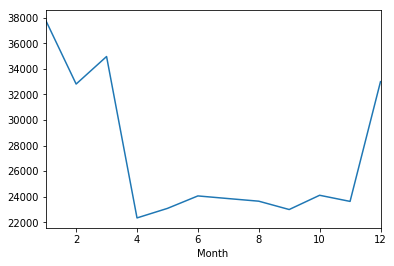

In [34]:
# direct

df.groupby("Month").count()["twp"].plot()

** Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column. **

In [36]:
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons/Departments,Hour,Day of Week,Day Num,Day Num 2
Month,,,,,,,,,,,,,,
1,37824,37824,37824,33480,37824,37824,37812,37824,37824,37824,37824,37824,37824,37824
2,32828,32828,32828,28963,32828,32828,32817,32828,32828,32828,32828,32828,32828,32828
3,34987,34987,34987,31070,34987,34987,34973,34987,34987,34987,34987,34987,34987,34987
4,22343,22343,22343,19671,22343,22343,22336,22343,22343,22343,22343,22343,22343,22343
5,23093,23093,23093,20254,23093,23093,23082,23093,23093,23093,23093,23093,23093,23093
6,24065,24065,24065,21070,24065,24065,24058,24065,24065,24065,24065,24065,24065,24065
7,23856,23856,23856,20940,23856,23856,23850,23856,23856,23856,23856,23856,23856,23856
8,23657,23657,23657,20739,23657,23657,23646,23657,23657,23657,23657,23657,23657,23657
9,23001,23001,23001,20014,23001,23001,22993,23001,23001,23001,23001,23001,23001,23001


In [37]:
byMonth.reset_index(inplace = True)

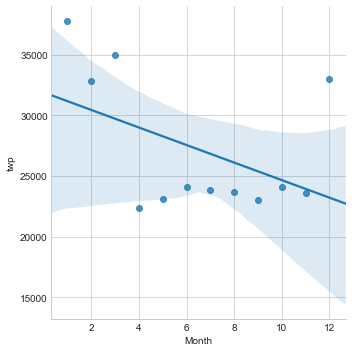

In [39]:
sns.set_style("whitegrid")
sns.lmplot(x = "Month", y = "twp", data = byMonth)

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. ** 

In [25]:
df["Date"] = df["timeStamp"].dt.date

In [26]:
Date = df.groupby("Date").count()

In [27]:
Date.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
Date,,,,,,,,,,
2015-12-10,114,114,114,100,114,114,114,114,114,114
2015-12-11,391,391,391,332,391,391,391,391,391,391
2015-12-12,402,402,402,334,402,402,402,402,402,402
2015-12-13,316,316,316,279,316,316,316,316,316,316
2015-12-14,444,444,444,386,444,444,443,444,444,444


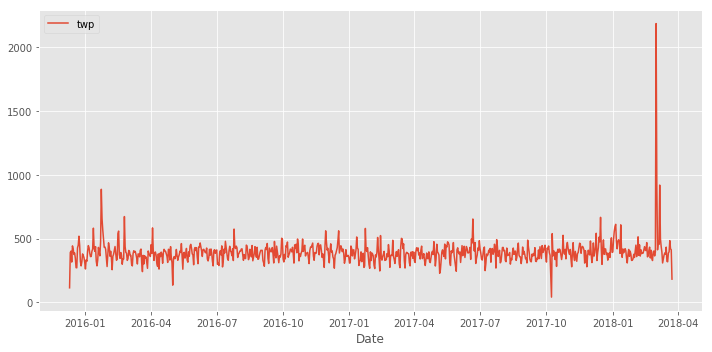

In [29]:
Date.plot(y = "twp",figsize=(10,5))
plt.tight_layout()

** Now we recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

In [47]:
df["Reasons/Departments"].unique()

array(['EMS', 'Fire', 'Traffic'], dtype=object)

In [48]:
# dataframe with only "EMS" being the reason of call.

df[df["Reasons/Departments"] == "EMS"]

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons/Departments,Hour,Month,Day of Week,Day Num,Day Num 2,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thursday,3,3,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thursday,3,3,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thursday,3,3,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thursday,3,3,2015-12-10
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,1,EMS,15,12,Thursday,3,3,2015-12-10
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 16:46:48,HORSHAM,LAUREL AVE & OAKDALE AVE,1,EMS,16,12,Thursday,3,3,2015-12-10
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 16:17:05,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1,EMS,16,12,Thursday,3,3,2015-12-10
8,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438.0,EMS: SYNCOPAL EPISODE,2015-12-10 16:51:42,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,1,EMS,16,12,Thursday,3,3,2015-12-10
16,40.243258,-75.286552,SUSQUEHANNA AVE & W MAIN ST; LANSDALE; Statio...,19446.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 17:42:44,LANSDALE,SUSQUEHANNA AVE & W MAIN ST,1,EMS,17,12,Thursday,3,3,2015-12-10
17,40.312181,-75.574260,CHARLOTTE ST & MILES RD; NEW HANOVER; Station...,19525.0,EMS: DIZZINESS,2015-12-10 17:41:54,NEW HANOVER,CHARLOTTE ST & MILES RD,1,EMS,17,12,Thursday,3,3,2015-12-10


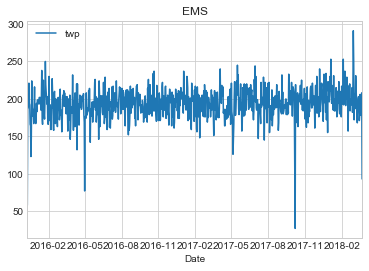

In [49]:
df[df["Reasons/Departments"] == "EMS"].groupby("Date").count().plot(y = "twp", title = "EMS")

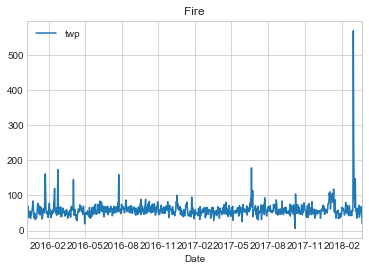

In [50]:
df[df["Reasons/Departments"] == "Fire"].groupby("Date").count().plot(y = "twp", title = "Fire")

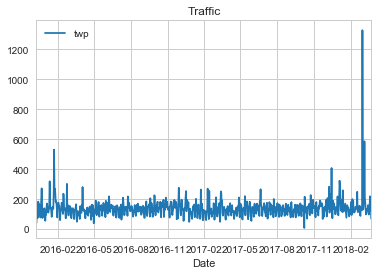

In [51]:
sns.set_context("notebook")
df[df["Reasons/Departments"] == "Traffic"].groupby("Date").count().plot(y = "twp", title = "Traffic")

____
** Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week.**

In [53]:
# create 2 subgroups
df.groupby(by=['Day of Week','Hour'])

In [56]:
# move the hour column to rows using unstack method

df2 = df.groupby(by=['Day of Week','Hour']).count()["Reasons/Departments"].unstack()
df2

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Friday,896,789,701,644,633,786,1286,2087,2487,2570,...,3290,3562,3726,3596,2858,2562,2205,1916,1765,1396
Monday,931,732,663,585,683,862,1291,2175,2714,2766,...,2729,3034,3082,3116,2729,2179,1912,1503,1303,1003
Saturday,1130,999,908,767,742,788,957,1295,1674,2132,...,2643,2563,2529,2525,2477,2320,2074,1839,1579,1469
Sunday,1159,1026,955,800,717,736,880,1196,1492,1849,...,2276,2170,2200,2234,2179,2067,1753,1536,1235,1177
Thursday,871,690,727,603,573,833,1386,2254,2613,2719,...,2863,3044,3017,3335,2707,2226,1974,1724,1360,1120
Tuesday,842,698,625,598,634,858,1386,2269,2853,2764,...,2937,3149,3335,3286,2918,2283,1960,1660,1329,1025
Wednesday,805,738,620,626,560,798,1382,2319,2751,2744,...,3095,3211,3413,3435,2782,2296,2064,1682,1422,1103


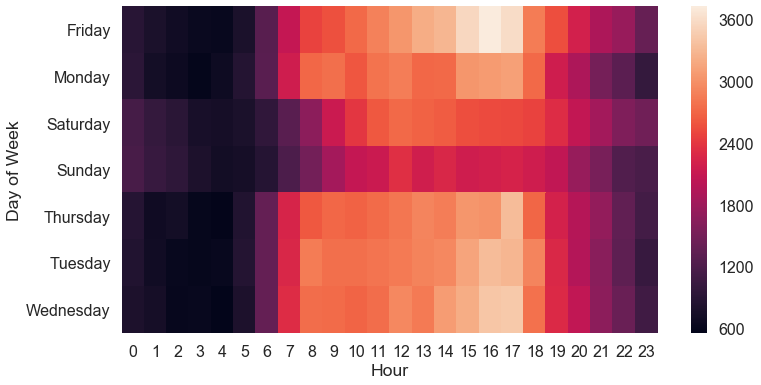

In [57]:
plt.figure(figsize = (12,6))
sns.set_context("poster")
sns.heatmap(data = df2)

** Now create a clustermap using this DataFrame. **

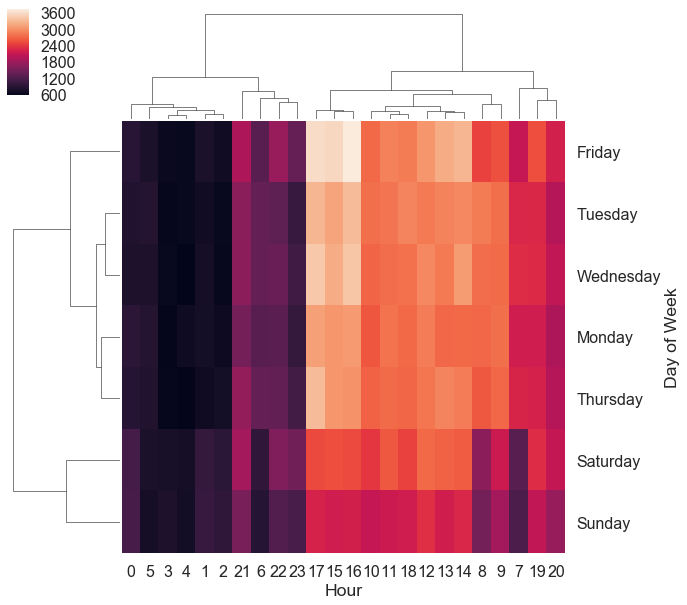

In [58]:
sns.clustermap(data = df2)

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [59]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons/Departments,Hour,Month,Day of Week,Day Num,Day Num 2,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thursday,3,3,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thursday,3,3,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thursday,3,3,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thursday,3,3,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thursday,3,3,2015-12-10


In [60]:
df3 = df.groupby(by = ["Day of Week", "Month"]).count()["Reasons/Departments"].unstack()
df3

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,,,
Friday,5532,4848,7005,3574,3278,3747,3736,3297,4226,3433,3377,5570
Monday,5716,5214,4313,3088,3538,3264,3687,3325,3031,4250,3262,4286
Saturday,5103,4431,4355,3490,2764,3024,3515,2810,3144,3042,2972,5200
Sunday,4882,3806,3268,3026,2580,2679,3259,2658,2565,3172,2592,3896
Thursday,4985,4708,5601,3097,3289,4095,3248,3507,3702,3189,3478,4899
Tuesday,6118,4755,4752,3065,3991,3376,3213,4044,3142,3689,3891,4691
Wednesday,5488,5066,5693,3003,3653,3880,3198,4016,3191,3338,4067,4477


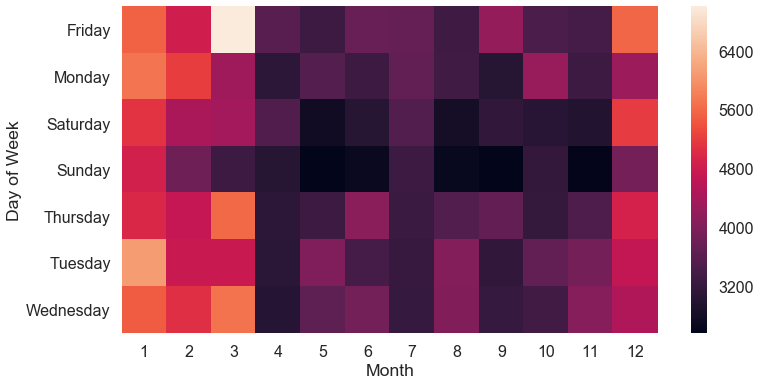

In [61]:
plt.figure(figsize = (12,6))
sns.heatmap(df3)

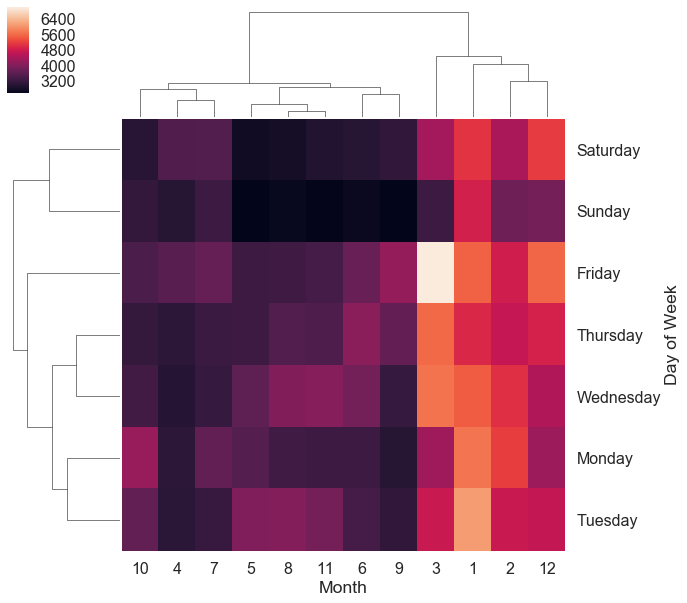

In [62]:
plt.figure(figsize = (12,6))
sns.clustermap(df3)